In [1]:
# TO-DO
## To be implemented yet
# Day 1: Spend building the front-end for iOS, android & web
# Day 2: Spend building the deep learning CNN models, viz., YOLO to object detect license plates
# Day 3: Spend semantically(character) segment numberplates and integrate with front-end

In [19]:
!python './server.py'

 * Serving Flask app 'server'
 * Debug mode: on
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat
 * Debugger is active!
 * Debugger PIN: 949-036-341
^C


In [21]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
import keras
import easyocr
# from keras import optimizers
# from keras import Sequential
# from keras.preprocessing.image import ImageDataGenerator
# from keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Conv2D

In [22]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [23]:
# Making sure of the tensorflow compatibility with the keras API/framework
print("Tensorflow version: " + tf.__version__ + " Keras version: " + keras.__version__)

Tensorflow version: 2.15.0 Keras version: 2.15.0


In [24]:
plate_cascade = cv2.CascadeClassifier('./filters/indian_license_plate.xml')
def detect_plate(img, text=''):
    plate = None  # Initialize plate with None
    plate_img = img.copy()
    roi = img.copy()
    plate_rect = plate_cascade.detectMultiScale(plate_img, scaleFactor=1.2, minNeighbors=7)
    for (x, y, w, h) in plate_rect:
        roi_ = roi[y:y+h, x:x+w, :]
        plate = roi[y:y+h, x:x+w, :]
        cv2.rectangle(plate_img, (x+2, y), (x+w-3, y+h-5), (51, 181, 155), 3)
    if text != '' and plate is not None:
        plate_img = cv2.putText(plate_img, text, (x-w//2, y-h//2), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.5, (51, 181, 155), 1, cv2.LINE_AA)

    return plate_img, plate

def display(img_, title=''):
    img = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(10,6))
    ax = plt.subplot(111)
    ax.imshow(img)
    plt.axis('off')
    plt.title(title)
    plt.show()

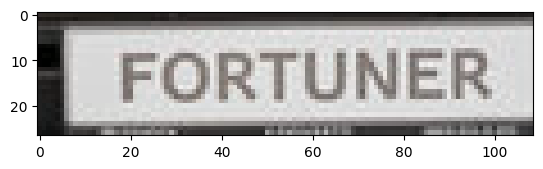

In [27]:
imga = cv2.imread('./dataset/car_fort.jpg')
cropped_image = detect_plate(imga)[1]
plt.imshow(cropped_image)

In [26]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
print(result[0][1])

FORTUNER
